# Bagian 1: Klasifikasi Voice Gender dengan SVM

## Langkah 1: Import Library

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## Langkah 2: Load Data

In [21]:
# Load dataset
voice_data = pd.read_csv('../data/voice.csv')

# Tampilkan informasi dataset
print("Shape of dataset:", voice_data.shape)
print("\nFirst 5 rows:")
voice_data.head()

Shape of dataset: (3168, 21)

First 5 rows:


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [22]:
# Cek informasi
print("Dataset Info:")
voice_data.info()
print("\n" + "="*50)
print("\nDistribusi Label:")
print(voice_data['label'].value_counts())
print("\n" + "="*50)
print("\nCek missing values:")
print(voice_data.isnull().sum().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 n

## Langkah 3: Preprocessing Data

In [23]:
# Pisahkan fitur dan label
feature_set = voice_data.drop('label', axis=1)
target_label = voice_data['label']

# Encode label (male=1, female=0)
label_transformer = LabelEncoder()
target_encoded = label_transformer.fit_transform(target_label)

print("Features shape:", feature_set.shape)
print("Label shape:", target_encoded.shape)
print("\nLabel encoding:")
for idx, class_name in enumerate(label_transformer.classes_):
    print(f"{class_name}: {idx}")

Features shape: (3168, 20)
Label shape: (3168,)

Label encoding:
female: 0
male: 1


## Langkah 4: Membuat Model SVM dengan Berbagai Kernel dan Split Ratio

In [24]:
# Fungsi untuk melatih dan mengevaluasi model
def build_and_assess_classifier(features, labels, validation_ratio, kernel_variant, seed_value=42):
    # Split data
    feat_train, feat_valid, lbl_train, lbl_valid = train_test_split(
        features, labels, test_size=validation_ratio, random_state=seed_value, stratify=labels
    )
    
    # Buat model SVM dengan kernel tertentu
    if kernel_variant == 'poly':
        classifier = SVC(kernel=kernel_variant, degree=3, random_state=seed_value)
    else:
        classifier = SVC(kernel=kernel_variant, random_state=seed_value)
    
    # Latih model
    classifier.fit(feat_train, lbl_train)
    
    # Prediksi
    pred_train = classifier.predict(feat_train)
    pred_valid = classifier.predict(feat_valid)
    
    # Hitung akurasi
    score_train = accuracy_score(lbl_train, pred_train)
    score_valid = accuracy_score(lbl_valid, pred_valid)
    
    return score_train, score_valid, classifier

In [25]:
# Eksperimen dengan berbagai kernel dan split ratio
kernel_variants = ['linear', 'poly', 'rbf']
validation_ratios = [0.3, 0.2]  # 70:30 dan 80:20
partition_labels = ['70:30', '80:20']

# Simpan hasil
performance_records = []

print("Training models with different kernels and split ratios...")
print("="*70)

for idx, val_ratio in enumerate(validation_ratios):
    print(f"\nSplit Ratio: {partition_labels[idx]}")
    print("-"*70)
    
    for kernel_type in kernel_variants:
        print(f"Training with {kernel_type.upper()} kernel...", end=" ")
        train_score, valid_score, trained_clf = build_and_assess_classifier(
            feature_set, target_encoded, val_ratio, kernel_type
        )
        
        performance_records.append({
            'Split Ratio': partition_labels[idx],
            'Kernel': kernel_type.upper(),
            'Train Accuracy': train_score,
            'Test Accuracy': valid_score
        })
        
        print(f"Done! Test Accuracy: {valid_score:.4f}")

print("\n" + "="*70)
print("All models trained successfully!")

Training models with different kernels and split ratios...

Split Ratio: 70:30
----------------------------------------------------------------------
Training with LINEAR kernel... 

Done! Test Accuracy: 0.9201
Training with POLY kernel... Done! Test Accuracy: 0.5110
Training with RBF kernel... Done! Test Accuracy: 0.5110
Training with RBF kernel... Done! Test Accuracy: 0.6951

Split Ratio: 80:20
----------------------------------------------------------------------
Training with LINEAR kernel... Done! Test Accuracy: 0.6951

Split Ratio: 80:20
----------------------------------------------------------------------
Training with LINEAR kernel... Done! Test Accuracy: 0.9180
Training with POLY kernel... Done! Test Accuracy: 0.9180
Training with POLY kernel... Done! Test Accuracy: 0.5174
Training with RBF kernel... Done! Test Accuracy: 0.5174
Training with RBF kernel... Done! Test Accuracy: 0.6940

All models trained successfully!
Done! Test Accuracy: 0.6940

All models trained successfully!


## Langkah 5: Tabulasi Hasil

In [26]:
# Buat DataFrame dari hasil
metrics_table = pd.DataFrame(performance_records)

# Tampilkan tabel hasil
print("="*70)
print("TABEL PERFORMANSI MODEL SVM DENGAN BERBAGAI KERNEL DAN SPLIT RATIO")
print("="*70)
print("\n", metrics_table.to_string(index=False))
print("\n" + "="*70)

TABEL PERFORMANSI MODEL SVM DENGAN BERBAGAI KERNEL DAN SPLIT RATIO

 Split Ratio Kernel  Train Accuracy  Test Accuracy
      70:30 LINEAR        0.914750       0.920084
      70:30   POLY        0.515562       0.511041
      70:30    RBF        0.662607       0.695058
      80:20 LINEAR        0.921073       0.917981
      80:20   POLY        0.513812       0.517350
      80:20    RBF        0.670876       0.694006



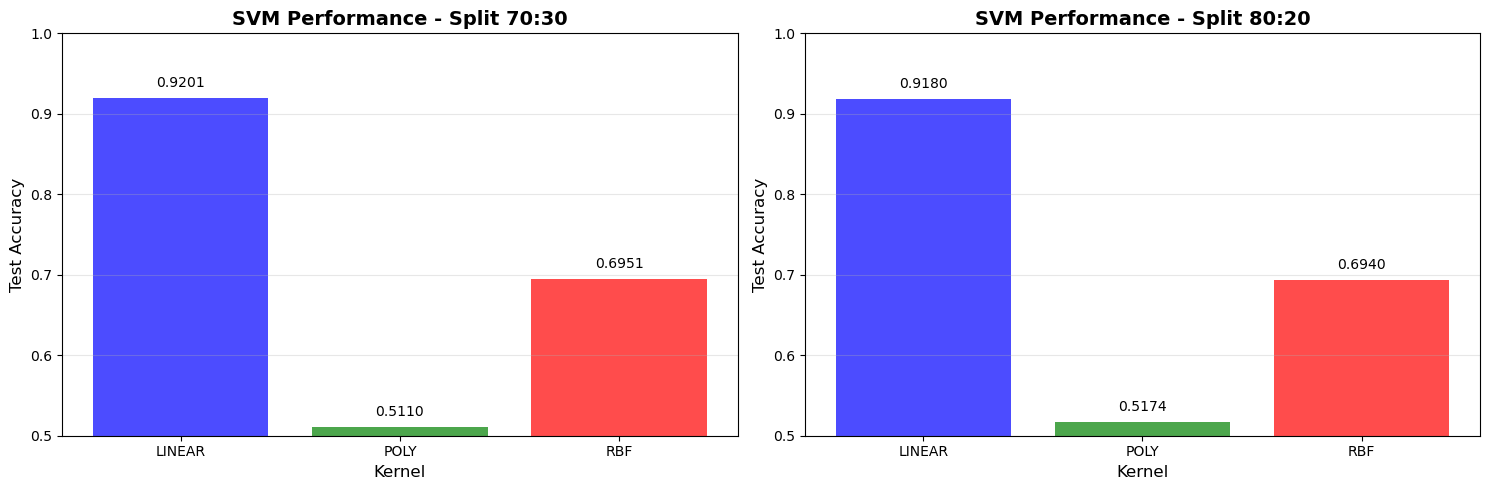

In [27]:
# Visualisasi hasil dengan bar chart
figure, (subplot1, subplot2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot untuk split 70:30
data_split_70 = metrics_table[metrics_table['Split Ratio'] == '70:30']
subplot1.bar(data_split_70['Kernel'], data_split_70['Test Accuracy'], color=['blue', 'green', 'red'], alpha=0.7)
subplot1.set_xlabel('Kernel', fontsize=12)
subplot1.set_ylabel('Test Accuracy', fontsize=12)
subplot1.set_title('SVM Performance - Split 70:30', fontsize=14, fontweight='bold')
subplot1.set_ylim([0.5, 1.0])
subplot1.grid(axis='y', alpha=0.3)

for position, accuracy_val in enumerate(data_split_70['Test Accuracy']):
    subplot1.text(position, accuracy_val + 0.01, f'{accuracy_val:.4f}', ha='center', va='bottom', fontsize=10)

# Plot untuk split 80:20
data_split_80 = metrics_table[metrics_table['Split Ratio'] == '80:20']
subplot2.bar(data_split_80['Kernel'], data_split_80['Test Accuracy'], color=['blue', 'green', 'red'], alpha=0.7)
subplot2.set_xlabel('Kernel', fontsize=12)
subplot2.set_ylabel('Test Accuracy', fontsize=12)
subplot2.set_title('SVM Performance - Split 80:20', fontsize=14, fontweight='bold')
subplot2.set_ylim([0.5, 1.0])
subplot2.grid(axis='y', alpha=0.3)

for position, accuracy_val in enumerate(data_split_80['Test Accuracy']):
    subplot2.text(position, accuracy_val + 0.01, f'{accuracy_val:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Bagian 2: Klasifikasi Siang/Malam dengan Fitur Histogram

## Langkah 1: Import Library Tambahan untuk Image Processing

In [28]:
from pathlib import Path
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import GridSearchCV

## Langkah 2: Load Dataset Gambar

In [29]:
path_train_images = "../images/training/"
path_test_images = "../images/test/"

# Fungsi untuk load dataset gambar
def fetch_image_dataset(directory_path):
    base_path = Path(directory_path)
    subdirectories = base_path.glob('*')

    image_collection = []

    for subdir in subdirectories:
        if subdir.is_dir(): 
            category = subdir.name 
            for img_file in subdir.glob('*.jpg'):
                image_data = mpimg.imread(img_file)

                if image_data is not None:
                    image_collection.append((image_data, category))
    
    return image_collection

# Load training dan test data
print("Loading training images...")
train_image_list = fetch_image_dataset(path_train_images)
print(f"Loaded {len(train_image_list)} training images")

print("\nLoading test images...")
test_image_list = fetch_image_dataset(path_test_images)
print(f"Loaded {len(test_image_list)} test images")

Loading training images...
Loaded 240 training images

Loading test images...
Loaded 240 training images

Loading test images...
Loaded 160 test images
Loaded 160 test images


## Langkah 3: Preprocessing - Standarisasi Ukuran

In [30]:
# Fungsi untuk standarisasi ukuran gambar
def normalize_image_dimensions(raw_image):
    # Resize ke w: 1100, h: 600
    resized_image = cv2.resize(raw_image, (1100, 600))
    return resized_image

# Fungsi untuk encoding label
def transform_label_to_numeric(class_label):
    # Encode: day=1, night=0
    return 1 if class_label == 'day' else 0

# Fungsi untuk preprocessing
def prepare_image_dataset(raw_image_list):
    processed_collection = []
    
    for entry in raw_image_list:
        raw_img = entry[0]
        class_name = entry[1]
        
        # Standarisasi gambar
        normalized_img = normalize_image_dimensions(raw_img)
        
        # Encode label
        numeric_label = transform_label_to_numeric(class_name)
        
        processed_collection.append((normalized_img, numeric_label))
    
    return processed_collection

# Preprocessing data training dan test
print("Preprocessing training images...")
processed_train_set = prepare_image_dataset(train_image_list)

print("Preprocessing test images...")
processed_test_set = prepare_image_dataset(test_image_list)

print(f"\nTraining images: {len(processed_train_set)}")
print(f"Test images: {len(processed_test_set)}")

Preprocessing training images...
Preprocessing test images...
Preprocessing test images...

Training images: 240
Test images: 160

Training images: 240
Test images: 160


## Langkah 4: Ekstraksi Fitur Histogram

In [31]:
# Fungsi untuk ekstraksi fitur histogram RGB
def compute_rgb_histogram(input_image, num_bins=32):
    feature_vector = []
    
    # Hitung histogram untuk setiap channel (R, G, B)
    for channel_idx in range(3):
        channel_hist = cv2.calcHist([input_image], [channel_idx], None, [num_bins], [0, 256])
        # Normalisasi histogram
        channel_hist = channel_hist.flatten() / channel_hist.sum()
        feature_vector.extend(channel_hist)
    
    return np.array(feature_vector)

# Fungsi untuk ekstraksi fitur dari semua gambar
def build_feature_matrix(image_dataset, num_bins=32):
    feature_matrix = []
    label_vector = []
    
    for img_data, img_label in image_dataset:
        histogram_features = compute_rgb_histogram(img_data, num_bins)
        feature_matrix.append(histogram_features)
        label_vector.append(img_label)
    
    return np.array(feature_matrix), np.array(label_vector)

# Ekstraksi fitur histogram dengan 32 bins
print("Extracting histogram features from training images...")
feature_train_matrix, label_train_vector = build_feature_matrix(processed_train_set, num_bins=32)

print("Extracting histogram features from test images...")
feature_test_matrix, label_test_vector = build_feature_matrix(processed_test_set, num_bins=32)

print(f"\nTraining features shape: {feature_train_matrix.shape}")
print(f"Training labels shape: {label_train_vector.shape}")
print(f"Test features shape: {feature_test_matrix.shape}")
print(f"Test labels shape: {label_test_vector.shape}")

Extracting histogram features from training images...
Extracting histogram features from test images...
Extracting histogram features from test images...

Training features shape: (240, 96)
Training labels shape: (240,)
Test features shape: (160, 96)
Test labels shape: (160,)

Training features shape: (240, 96)
Training labels shape: (240,)
Test features shape: (160, 96)
Test labels shape: (160,)


## Langkah 5: Model SVM dengan Kernel RBF (Baseline)

In [32]:
# Model baseline dengan RBF kernel (parameter default)
print("Training SVM with RBF kernel (baseline)...")
rbf_classifier_base = SVC(kernel='rbf', random_state=42)
rbf_classifier_base.fit(feature_train_matrix, label_train_vector)

# Prediksi
prediction_train_base = rbf_classifier_base.predict(feature_train_matrix)
prediction_test_base = rbf_classifier_base.predict(feature_test_matrix)

# Evaluasi
score_train_base = accuracy_score(label_train_vector, prediction_train_base)
score_test_base = accuracy_score(label_test_vector, prediction_test_base)

print("\n" + "="*70)
print("BASELINE MODEL (RBF Kernel - Default Parameters)")
print("="*70)
print(f"Training Accuracy: {score_train_base:.4f}")
print(f"Test Accuracy: {score_test_base:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(label_test_vector, prediction_test_base, 
                          target_names=['Night', 'Day']))

Training SVM with RBF kernel (baseline)...

BASELINE MODEL (RBF Kernel - Default Parameters)
Training Accuracy: 1.0000
Test Accuracy: 0.9688

Classification Report (Test Set):
              precision    recall  f1-score   support

       Night       0.97      0.96      0.97        80
         Day       0.96      0.97      0.97        80

    accuracy                           0.97       160
   macro avg       0.97      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160



## Langkah 6: Hyperparameter Tuning dengan GridSearchCV

In [33]:
# Parameter grid untuk tuning
hyperparameter_space = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

print("Performing Grid Search for hyperparameter tuning...")
print(f"Testing {len(hyperparameter_space['C']) * len(hyperparameter_space['gamma'])} combinations...")
print("This may take a few minutes...\n")

# GridSearchCV
optimization_searcher = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    hyperparameter_space,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
optimization_searcher.fit(feature_train_matrix, label_train_vector)

print("\n" + "="*70)
print("GRID SEARCH RESULTS")
print("="*70)
print(f"Best parameters: {optimization_searcher.best_params_}")
print(f"Best cross-validation accuracy: {optimization_searcher.best_score_:.4f}")

Performing Grid Search for hyperparameter tuning...
Testing 24 combinations...
This may take a few minutes...

Fitting 5 folds for each of 24 candidates, totalling 120 fits

GRID SEARCH RESULTS
Best parameters: {'C': 10, 'gamma': 'scale'}
Best cross-validation accuracy: 1.0000

GRID SEARCH RESULTS
Best parameters: {'C': 10, 'gamma': 'scale'}
Best cross-validation accuracy: 1.0000


## Langkah 7: Evaluasi Model dengan Hyperparameter Terbaik

In [34]:
# Ambil model terbaik
optimized_classifier = optimization_searcher.best_estimator_

# Prediksi dengan model terbaik
prediction_train_opt = optimized_classifier.predict(feature_train_matrix)
prediction_test_opt = optimized_classifier.predict(feature_test_matrix)

# Evaluasi
score_train_opt = accuracy_score(label_train_vector, prediction_train_opt)
score_test_opt = accuracy_score(label_test_vector, prediction_test_opt)

print("\n" + "="*70)
print("TUNED MODEL (RBF Kernel - Best Parameters)")
print("="*70)
print(f"Training Accuracy: {score_train_opt:.4f}")
print(f"Test Accuracy: {score_test_opt:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(label_test_vector, prediction_test_opt, 
                          target_names=['Night', 'Day']))


TUNED MODEL (RBF Kernel - Best Parameters)
Training Accuracy: 1.0000
Test Accuracy: 0.9688

Classification Report (Test Set):
              precision    recall  f1-score   support

       Night       0.97      0.96      0.97        80
         Day       0.96      0.97      0.97        80

    accuracy                           0.97       160
   macro avg       0.97      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160



## Langkah 8: Perbandingan Hasil

In [35]:
# Buat tabel perbandingan
evaluation_summary = {
    'Model': ['Baseline (Default RBF)', f'Tuned RBF (C={optimization_searcher.best_params_["C"]}, gamma={optimization_searcher.best_params_["gamma"]})'],
    'Train Accuracy': [score_train_base, score_train_opt],
    'Test Accuracy': [score_test_base, score_test_opt]
}

summary_dataframe = pd.DataFrame(evaluation_summary)

print("\n" + "="*70)
print("PERBANDINGAN PERFORMANSI MODEL")
print("="*70)
print(summary_dataframe.to_string(index=False))
print("\n" + "="*70)

# Hitung improvement
performance_gain = (score_test_opt - score_test_base) * 100
print(f"\nImprovement: {performance_gain:.2f}%")


PERBANDINGAN PERFORMANSI MODEL
                        Model  Train Accuracy  Test Accuracy
       Baseline (Default RBF)             1.0        0.96875
Tuned RBF (C=10, gamma=scale)             1.0        0.96875


Improvement: 0.00%


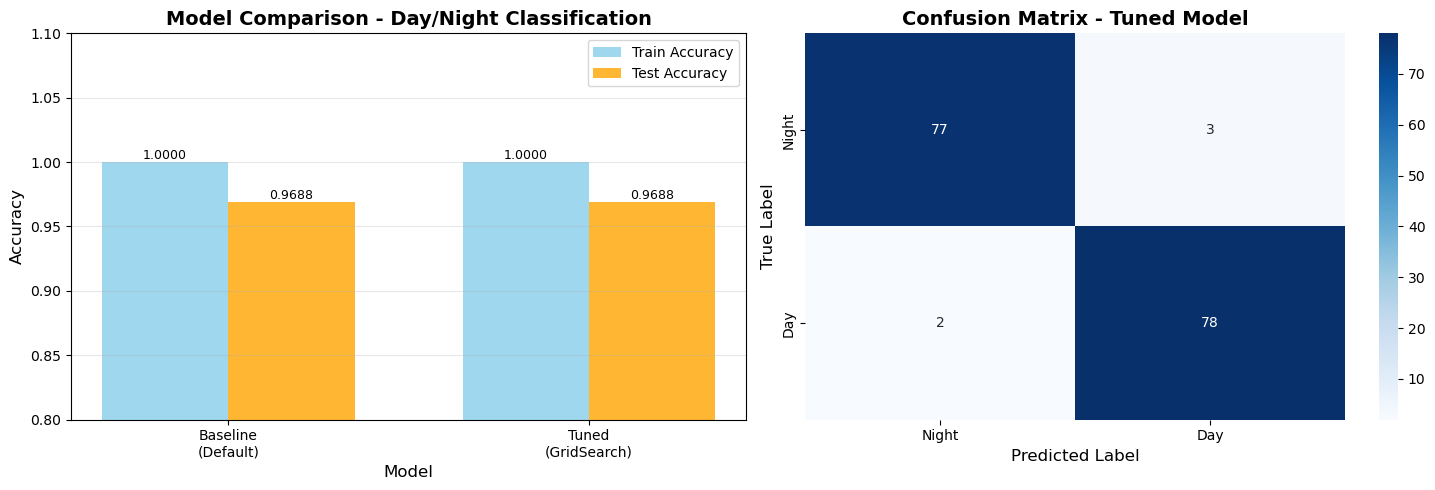

In [37]:
# Visualisasi perbandingan
visualization_canvas, plot_areas = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart perbandingan
model_labels = ['Baseline\n(Default)', 'Tuned\n(GridSearch)']
train_scores = [score_train_base, score_train_opt]
test_scores = [score_test_base, score_test_opt]

bar_positions = np.arange(len(model_labels))
bar_thickness = 0.35

plot_left = plot_areas[0]
bar_group1 = plot_left.bar(bar_positions - bar_thickness/2, train_scores, bar_thickness, label='Train Accuracy', color='skyblue', alpha=0.8)
bar_group2 = plot_left.bar(bar_positions + bar_thickness/2, test_scores, bar_thickness, label='Test Accuracy', color='orange', alpha=0.8)

plot_left.set_xlabel('Model', fontsize=12)
plot_left.set_ylabel('Accuracy', fontsize=12)
plot_left.set_title('Model Comparison - Day/Night Classification', fontsize=14, fontweight='bold')
plot_left.set_xticks(bar_positions)
plot_left.set_xticklabels(model_labels)
plot_left.legend()
plot_left.set_ylim([0.8, 1.1])
plot_left.grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for bar_set in [bar_group1, bar_group2]:
    for single_bar in bar_set:
        bar_height = single_bar.get_height()
        plot_left.text(single_bar.get_x() + single_bar.get_width()/2., bar_height,
                f'{bar_height:.4f}',
                ha='center', va='bottom', fontsize=9)

# Confusion Matrix untuk model terbaik
confusion_mat = confusion_matrix(label_test_vector, prediction_test_opt)
plot_right = plot_areas[1]
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=plot_right, 
            xticklabels=['Night', 'Day'], yticklabels=['Night', 'Day'])
plot_right.set_xlabel('Predicted Label', fontsize=12)
plot_right.set_ylabel('True Label', fontsize=12)
plot_right.set_title('Confusion Matrix - Tuned Model', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()